## DATA1030 Project

## Name: Zichen Zhao

## Brown University

## Link to my project github repo: [https://github.com/ZichenZhao529/DATA030_Project.git]


## 1.Loading the Data and Managing Data Type

1.1 Import library and data

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('/Users/zichenzhao/Desktop/amazon products sales data.csv')

print(f"Dataset Shape: {df.shape}")
print(df.isnull().sum())
print("Columns:", df.columns.tolist())



Dataset Shape: (42675, 17)
product_title               0
product_rating           1024
total_reviews            1024
purchased_last_month    10511
discounted_price         2062
original_price           2062
is_best_seller              0
is_sponsored                0
has_coupon                  0
buy_box_availability    14653
delivery_date           11983
sustainability_tags     39267
product_image_url           0
product_page_url         2069
data_collected_at           0
product_category            0
discount_percentage      2062
dtype: int64
Columns: ['product_title', 'product_rating', 'total_reviews', 'purchased_last_month', 'discounted_price', 'original_price', 'is_best_seller', 'is_sponsored', 'has_coupon', 'buy_box_availability', 'delivery_date', 'sustainability_tags', 'product_image_url', 'product_page_url', 'data_collected_at', 'product_category', 'discount_percentage']


## 2. EDA

2.1 Log-Transformed Distribution of Products Purchased Last Month

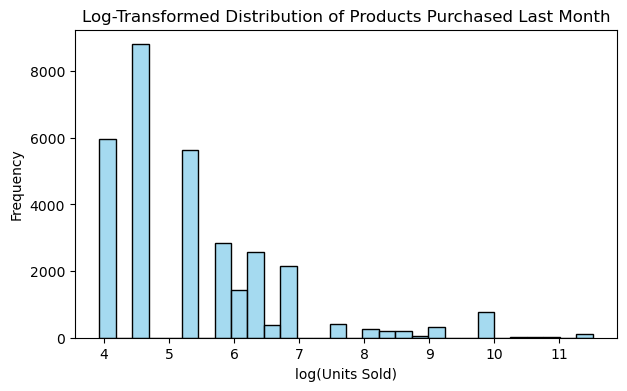

/var/folders/t2/4qybmrhj6m9ct0736s2tg40w0000gn/T/ipykernel_69588/2836987713.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='product_rating', data=df, palette='crest')


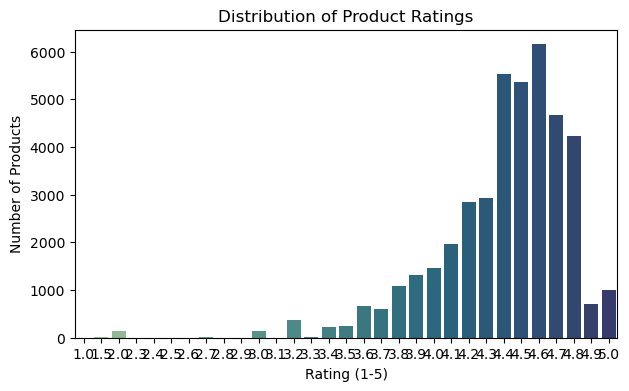

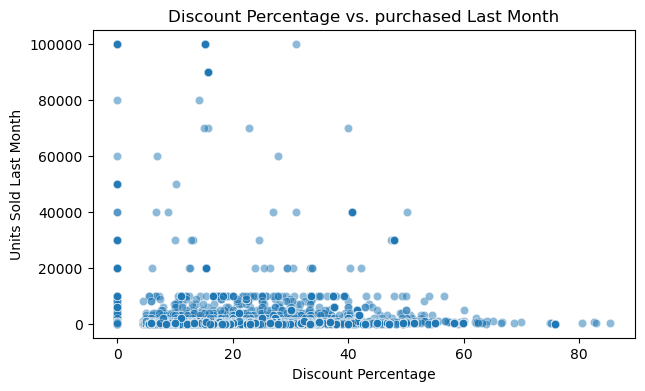

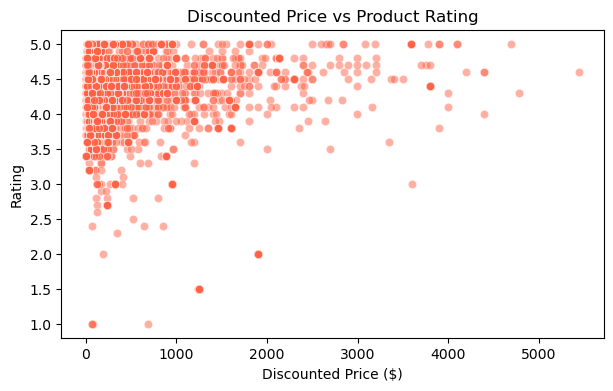

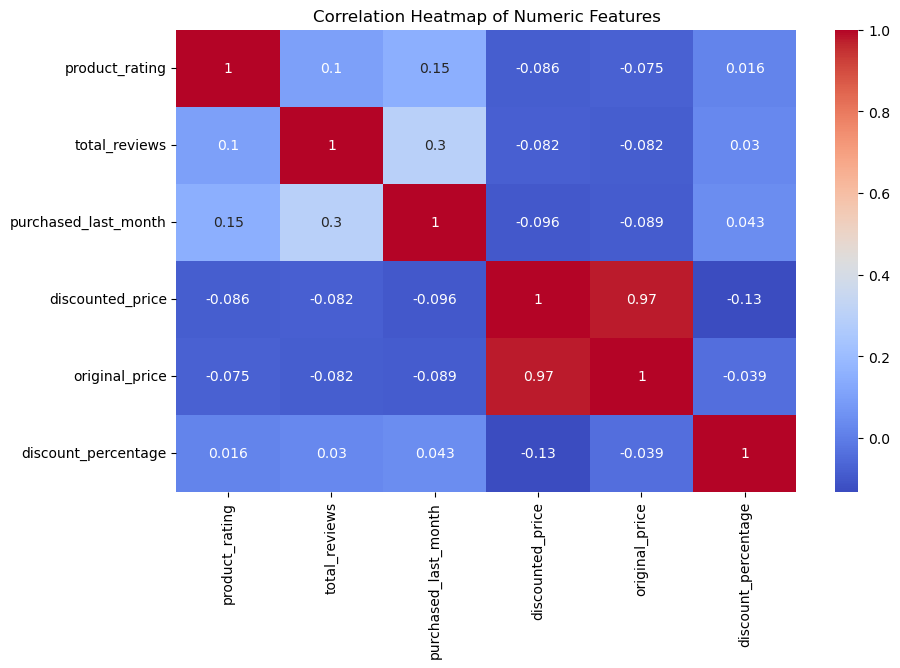

/var/folders/t2/4qybmrhj6m9ct0736s2tg40w0000gn/T/ipykernel_69588/2836987713.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


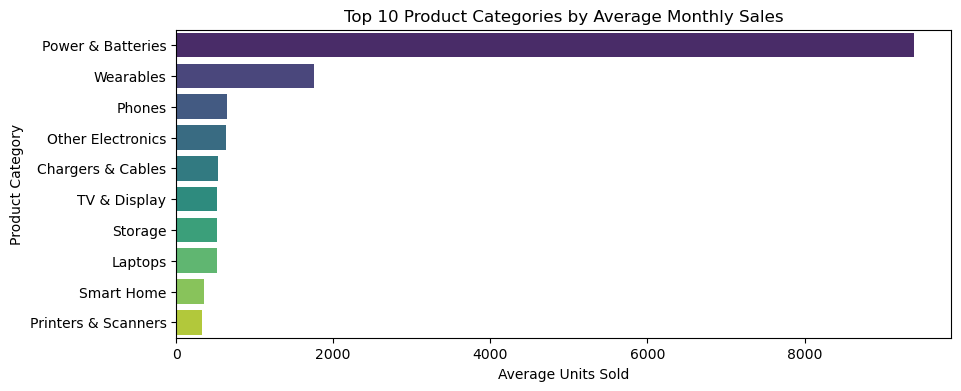

/var/folders/t2/4qybmrhj6m9ct0736s2tg40w0000gn/T/ipykernel_69588/2836987713.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


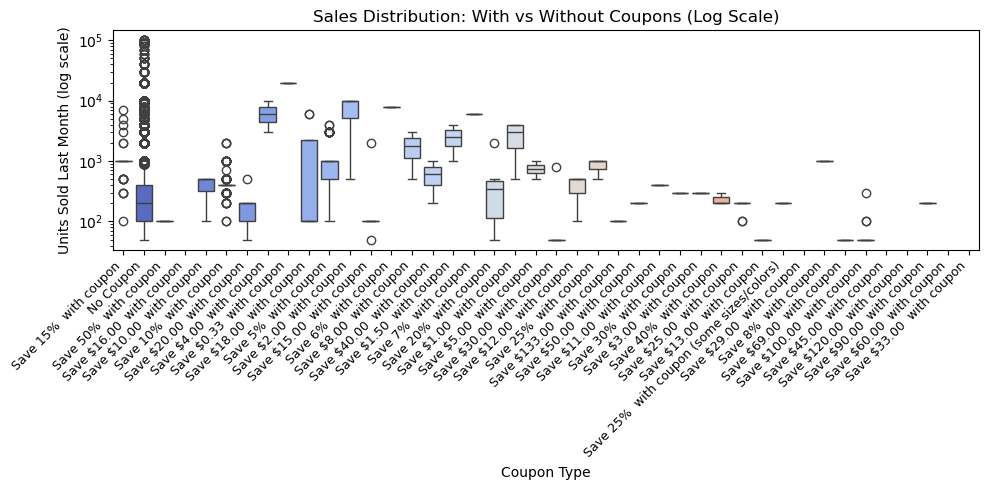

/var/folders/t2/4qybmrhj6m9ct0736s2tg40w0000gn/T/ipykernel_69588/2836987713.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_coupon', y='purchased_last_month', data=df, palette='Set2')


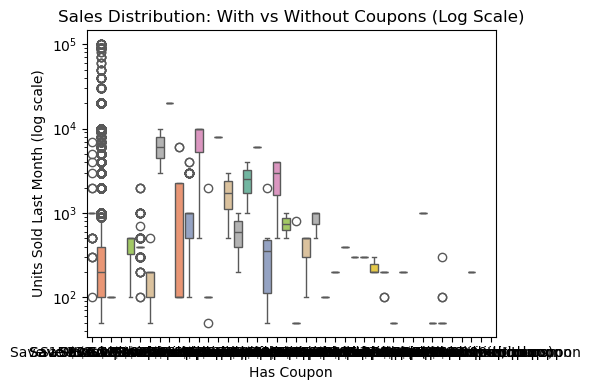

/var/folders/t2/4qybmrhj6m9ct0736s2tg40w0000gn/T/ipykernel_69588/2836987713.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_best_seller', y='purchased_last_month', data=df, palette='Set2')


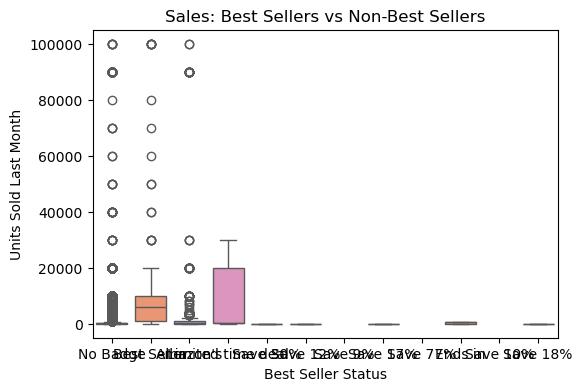

/var/folders/t2/4qybmrhj6m9ct0736s2tg40w0000gn/T/ipykernel_69588/2836987713.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_sponsored', y='purchased_last_month', data=df, palette='cool')


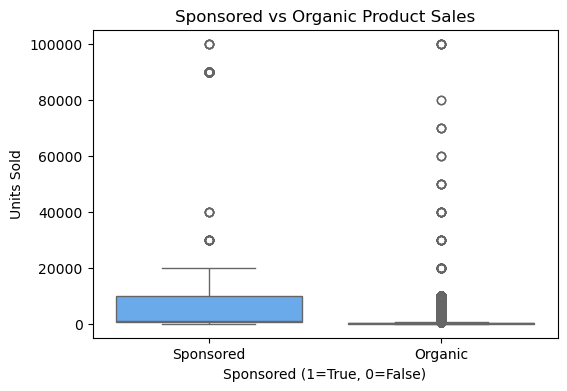

/var/folders/t2/4qybmrhj6m9ct0736s2tg40w0000gn/T/ipykernel_69588/2836987713.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_reviews', y='product_title', data=top_reviewed, palette='mako')


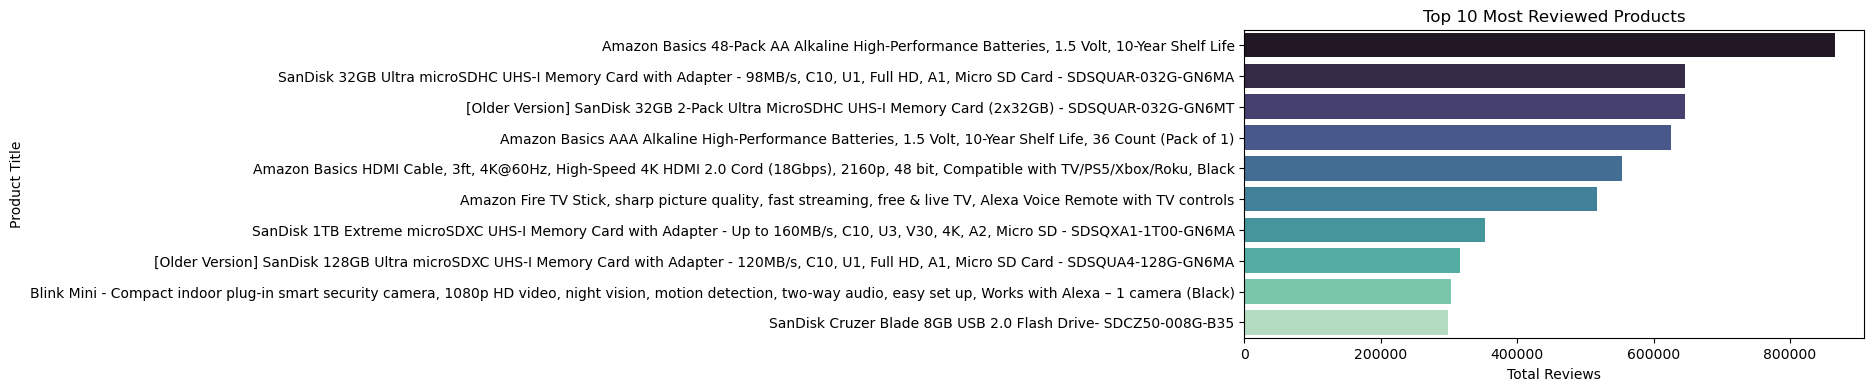

In [14]:
#Log-Transformed Distribution of Products Purchased Last Month
plt.figure(figsize=(7,4))
sns.histplot(np.log1p(df['purchased_last_month']), bins=30, color='skyblue')
plt.title("Log-Transformed Distribution of Products Purchased Last Month")
plt.xlabel("log(Units Sold)")
plt.ylabel("Frequency")
plt.show()

# Product Rating Distribution
plt.figure(figsize=(7,4))
sns.countplot(x='product_rating', data=df, palette='crest')
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating (1-5)")
plt.ylabel("Number of Products")
plt.show()


# Relationship: Discount vs purchqased_last_month
plt.figure(figsize=(7,4))
sns.scatterplot(x='discount_percentage', y='purchased_last_month', data=df, alpha=0.5)
plt.title("Discount Percentage vs. purchased Last Month")
plt.xlabel("Discount Percentage")
plt.ylabel("Units Sold Last Month")
plt.show()


# Relationship: Price vs Rating
plt.figure(figsize=(7,4))
sns.scatterplot(x='discounted_price', y='product_rating', data=df, alpha=0.5, color='tomato')
plt.title("Discounted Price vs Product Rating")
plt.xlabel("Discounted Price ($)")
plt.ylabel("Rating")
plt.show()


# Correlation Heatmap (Numerical Features)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


# Sales by Product Category
plt.figure(figsize=(10,4))
top_categories = df.groupby('product_category')['purchased_last_month'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title("Top 10 Product Categories by Average Monthly Sales")
plt.xlabel("Average Units Sold")
plt.ylabel("Product Category")
plt.show()


# Effect of Coupons on Sales
plt.figure(figsize=(10,5))  # wider figure for more coupon types

sns.boxplot(
    x='has_coupon',
    y='purchased_last_month',
    data=df,
    palette='coolwarm'
)

plt.yscale('log')  # handle extreme outliers
plt.title("Sales Distribution: With vs Without Coupons (Log Scale)")
plt.xlabel("Coupon Type")
plt.ylabel("Units Sold Last Month (log scale)")
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.show()



plt.figure(figsize=(6,4))

# Use log scale for y-axis to reduce skewness from outliers
sns.boxplot(x='has_coupon', y='purchased_last_month', data=df, palette='Set2')
plt.yscale('log')
plt.title("Sales Distribution: With vs Without Coupons (Log Scale)")
plt.xlabel("Has Coupon")
plt.ylabel("Units Sold Last Month (log scale)")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# Best Seller vs Non-Best Seller
plt.figure(figsize=(6,4))
sns.boxplot(x='is_best_seller', y='purchased_last_month', data=df, palette='Set2')
plt.title("Sales: Best Sellers vs Non-Best Sellers")
plt.xlabel("Best Seller Status")
plt.ylabel("Units Sold Last Month")
plt.show()


# Sponsored Products vs Organic
plt.figure(figsize=(6,4))
sns.boxplot(x='is_sponsored', y='purchased_last_month', data=df, palette='cool')
plt.title("Sponsored vs Organic Product Sales")
plt.xlabel("Sponsored (1=True, 0=False)")
plt.ylabel("Units Sold")
plt.show()


# Top Products by Reviews
plt.figure(figsize=(8,4))
top_reviewed = df.nlargest(10, 'total_reviews')
sns.barplot(x='total_reviews', y='product_title', data=top_reviewed, palette='mako')
plt.title("Top 10 Most Reviewed Products")
plt.xlabel("Total Reviews")
plt.ylabel("Product Title")
plt.show()


## 3. Data Cleaning, Splitting and Preprocessing

3.1 Data Cleaning

In [15]:
from sklearn.impute import SimpleImputer

df = df.dropna(subset=["purchased_last_month"])

drop_cols = [
    "product_title",
    "product_image_url",
    "product_page_url",
    "data_collected_at",
    "delivery_date",
    "discounted_price"   # dropped due to multicollinearity
]
df = df.drop(columns=drop_cols, errors="ignore")

#Define X and y 
target = "purchased_last_month"
X = df.drop(columns=[target])
y = df[target]

#Check missing values
missing_summary = X.isnull().sum()
missing_percent = (missing_summary / len(X)) * 100

print("Missing percentage per feature:\n")
print(missing_percent[missing_percent > 0])
print("\nMissing values in features:", X.isnull().sum())
#Imputation 
num_missing = ["product_rating", "total_reviews", 
               "original_price", "discount_percentage"]
cat_missing = ["buy_box_availability", "sustainability_tags"]

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

X[num_missing] = num_imputer.fit_transform(X[num_missing])
X[cat_missing] = cat_imputer.fit_transform(X[cat_missing])

#Final verification
print("\nRemaining missing values after imputation:")
print(X.isnull().sum()[X.isnull().sum() > 0])

print("\nMissing values in target:", y.isnull().sum())


Missing percentage per feature:

product_rating           0.236289
total_reviews            0.236289
original_price           5.782863
buy_box_availability    26.930730
sustainability_tags     91.474941
discount_percentage      5.782863
dtype: float64

Missing values in features: product_rating             76
total_reviews              76
original_price           1860
is_best_seller              0
is_sponsored                0
has_coupon                  0
buy_box_availability     8662
sustainability_tags     29422
product_category            0
discount_percentage      1860
dtype: int64

Remaining missing values after imputation:
Series([], dtype: int64)

Missing values in target: 0


3.2 Data Splitting

In [16]:
from sklearn.model_selection import train_test_split

# 60% train, 20% val, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, train_size=0.6, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print("Train shape:", X_train.shape)
print("Val shape:  ", X_val.shape)
print("Test shape: ", X_test.shape)


Train shape: (19298, 10)
Val shape:   (6433, 10)
Test shape:  (6433, 10)


3.3 Data Preprocessing

In [17]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# numeric (true continuous) features
num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
# treat rating separately as ordinal
num_features = [col for col in num_features if col != "product_rating"]

# ordinal feature
ordinal_features = ["product_rating"]

# nominal categorical features (remaining object / bool)
nominal_features = X.select_dtypes(include=["object", "bool"]).columns.tolist()
print("Numeric features:", num_features)
print("Ordinal features:", ordinal_features)
print("Nominal features:", nominal_features)


# numeric: median imputation + standardization
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# ordinal: most_frequent imputation + OrdinalEncoder
ord_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(
        handle_unknown="use_encoded_value",
        unknown_value=-1
    ))
])

# nominal: most_frequent imputation + OneHotEncoder
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# combine everything
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("ord", ord_pipeline, ordinal_features),
    ("cat", cat_pipeline, nominal_features)
])

# fit on train only, then transform all splits
preprocessor.fit(X_train)

X_train_prep = preprocessor.transform(X_train)
X_val_prep   = preprocessor.transform(X_val)
X_test_prep  = preprocessor.transform(X_test)

print("Before preprocessing:", X_train.shape)
print("After preprocessing:", X_train_prep.shape)


Numeric features: ['total_reviews', 'original_price', 'discount_percentage']
Ordinal features: ['product_rating']
Nominal features: ['is_best_seller', 'is_sponsored', 'has_coupon', 'buy_box_availability', 'sustainability_tags', 'product_category']
Before preprocessing: (19298, 10)
After preprocessing: (19298, 82)


## 4. Training the Model and Parameter Tunning

4.1 Ridge Regression

In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import numpy as np

#Hyperparameter Grid
param_grid_ridge = {
    "model__alpha": [0.01, 0.1, 1, 10, 100]
}

#Multiple Random States
random_states = [0, 42, 123, 2023, 789]

Ridge_Score = []  
Ridge_R2 = []     
Ridge_Models = [] 

for rs in random_states:

    print(f"\nRandom State: {rs}")

    #Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=rs
    )

    #Pipeline (Preprocessing + Ridge)
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("model", Ridge())
    ])
    #Cross-Validation Setup
    kf = KFold(n_splits=4, shuffle=True, random_state=rs)
    #Grid Search (RMSE)
    
    grid = GridSearchCV(
        pipe,
        param_grid=param_grid_ridge,
        scoring="neg_root_mean_squared_error",
        cv=kf,
        n_jobs=-1,
        return_train_score=True
    )

    #Train with CV
    grid.fit(X_train, y_train)

    print("Best Ridge Parameters:", grid.best_params_)
    print("Best Validation RMSE:", -grid.best_score_)

    #Final Test Evaluation
    best_ridge_model = grid.best_estimator_
    y_test_pred = best_ridge_model.predict(X_test)

    test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2_ridge = r2_score(y_test, y_test_pred)

    Ridge_Score.append(test_rmse_ridge)
    Ridge_R2.append(test_r2_ridge)
    Ridge_Models.append(best_ridge_model)

    print("Test RMSE:", test_rmse_ridge)
    print("Test R²:", test_r2_ridge)

#FINAL RIDGE SUMMARY
ridge_mean = np.mean(Ridge_Score)
ridge_std = np.std(Ridge_Score)
ridge_r2_mean = np.mean(Ridge_R2)

print("\nFINAL RIDGE REGRESSION SUMMARY")
print("Mean RMSE:", ridge_mean)
print("Std Dev RMSE:", ridge_std)
print("Mean R²:", ridge_r2_mean)



Random State: 0
Best Ridge Parameters: {'model__alpha': 0.01}
Best Validation RMSE: 5333.966677807226
Test RMSE: 5466.312625594036
Test R²: 0.26603138775830193

Random State: 42
Best Ridge Parameters: {'model__alpha': 10}
Best Validation RMSE: 5435.200895154705
Test RMSE: 4866.811672946198
Test R²: 0.27947070700976284

Random State: 123
Best Ridge Parameters: {'model__alpha': 10}
Best Validation RMSE: 5276.83013104408
Test RMSE: 5513.341738921786
Test R²: 0.2967146209676429

Random State: 2023
Best Ridge Parameters: {'model__alpha': 0.1}
Best Validation RMSE: 5250.519727853661
Test RMSE: 5689.246332501023
Test R²: 0.23365506326143715

Random State: 789
Best Ridge Parameters: {'model__alpha': 1}
Best Validation RMSE: 5128.94760712394
Test RMSE: 6080.311720831215
Test R²: 0.28132596250771325

FINAL RIDGE REGRESSION SUMMARY
Mean RMSE: 5523.2048181588525
Std Dev RMSE: 392.96917143187306
Mean R²: 0.2714395483009716


4.2 Random forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import numpy as np

#Multiple runs for standard deviation
random_states = [0, 42, 123, 2023, 789]

RF_Score = []
RF_R2 = []
RF_Models = []

for rs in random_states:

    print(f"\nRandom State: {rs}")

    #Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=rs
    )

    #Define Random Forest model
    rf = RandomForestRegressor(random_state=rs, n_jobs=-1)

    # 4. Full Pipeline (Preprocessing + Model)
    rf_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", rf)
    ])

    #Hyperparameter Grid
    param_grid = {
        "model__max_depth": [5, 10, 20, 40],
        "model__max_features": [0.5, 0.75, 1.0],
        "model__n_estimators": [100, 200]
    }

    #Cross-Validation Setup
    kf = KFold(n_splits=4, shuffle=True, random_state=rs)

    #Grid Search
    grid = GridSearchCV(
        rf_pipeline,
        param_grid=param_grid,
        cv=kf,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1,
        return_train_score=True
    )

    #Train
    grid.fit(X_train, y_train)

    print("Best RF Parameters:", grid.best_params_)
    print("Best Validation RMSE:", -grid.best_score_)

    #Final Test Evaluation
    best_rf_model = grid.best_estimator_

    y_test_pred = best_rf_model.predict(X_test)

    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)

    RF_Score.append(rmse_test)
    RF_R2.append(r2_test)
    RF_Models.append(best_rf_model)

    print("Test RMSE:", rmse_test)
    print("Test R²:", r2_test)

#FINAL MEAN + STANDARD DEVIATION
RF_mean = np.mean(RF_Score)
RF_std = np.std(RF_Score)
RF_r2_mean = np.mean(RF_R2)

print("\nFINAL RANDOM FOREST SUMMARY")
print("Mean RMSE:", RF_mean)
print("Std Dev RMSE:", RF_std)
print("Mean R²:", RF_r2_mean)



Random State: 0
Best RF Parameters: {'model__max_depth': 40, 'model__max_features': 0.5, 'model__n_estimators': 200}
Best Validation RMSE: 2052.4301032309504
Test RMSE: 1506.6207523816583
Test R²: 0.9442433790102679

Random State: 42
Best RF Parameters: {'model__max_depth': 20, 'model__max_features': 0.5, 'model__n_estimators': 100}
Best Validation RMSE: 2056.3765182036186
Test RMSE: 1561.4527407470182
Test R²: 0.9258313715021755

Random State: 123
Best RF Parameters: {'model__max_depth': 20, 'model__max_features': 0.5, 'model__n_estimators': 100}
Best Validation RMSE: 2039.1504329260497
Test RMSE: 1770.2610760371165
Test R²: 0.9274935897235788

Random State: 2023
Best RF Parameters: {'model__max_depth': 20, 'model__max_features': 0.5, 'model__n_estimators': 200}
Best Validation RMSE: 2019.0389995833289
Test RMSE: 1702.6273278399854
Test R²: 0.931363676053933

Random State: 789
Best RF Parameters: {'model__max_depth': 20, 'model__max_features': 0.5, 'model__n_estimators': 200}
Best Va

4.3 SVM

In [20]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import numpy as np

random_states = [0, 42, 123, 2023, 789]

SVM_Score = []
SVM_R2 = []
SVM_Models = []

for rs in random_states:

    print(f"\nRandom State: {rs}")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=rs
    )

    #Define SVM Regressor
    svr = SVR(kernel="rbf")

    #Full Pipeline
    svm_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", svr)
    ])

    #Hyperparameter Grid
    param_grid = {
        "model__C": [0.1, 1, 10, 100],
        "model__gamma": [0.001, 0.01, 0.1, 1],
        "model__epsilon": [0.1, 0.2, 0.5]
    }


    #Cross-Validation Setup
    kf = KFold(n_splits=4, shuffle=True, random_state=rs)

    #Grid Search
    grid_svm = GridSearchCV(
        svm_pipeline,
        param_grid=param_grid,
        cv=kf,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1,
        return_train_score=True
    )

    #Train
    grid_svm.fit(X_train, y_train)

    print("Best SVM Parameters:", grid_svm.best_params_)
    print("Best Validation RMSE:", -grid_svm.best_score_)

    #Final Test Evaluation
    best_svm_model = grid_svm.best_estimator_
    y_test_pred_svm = best_svm_model.predict(X_test)

    rmse_test_svm = np.sqrt(mean_squared_error(y_test, y_test_pred_svm))
    r2_test_svm = r2_score(y_test, y_test_pred_svm)

    SVM_Score.append(rmse_test_svm)
    SVM_R2.append(r2_test_svm)
    SVM_Models.append(best_svm_model)

    print("Test RMSE:", rmse_test_svm)
    print("Test R²:", r2_test_svm)


SVM_mean = np.mean(SVM_Score)
SVM_std = np.std(SVM_Score)
SVM_r2_mean = np.mean(SVM_R2)

print("\nFINAL SVM SUMMARY")
print("Mean RMSE:", SVM_mean)
print("Std Dev RMSE:", SVM_std)
print("Mean R²:", SVM_r2_mean)



Random State: 0


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best SVM Parameters: {'model__C': 100, 'model__epsilon': 0.5, 'model__gamma': 1}
Best Validation RMSE: 5703.065273336388
Test RMSE: 5652.2549507755375
Test R²: 0.21524870343981228

Random State: 42
Best SVM Parameters: {'model__C': 100, 'model__epsilon': 0.5, 'model__gamma': 1}
Best Validation RMSE: 5818.935130421604
Test RMSE: 4912.781181063212
Test R²: 0.26579489283952584

Random State: 123
Best SVM Parameters: {'model__C': 100, 'model__epsilon': 0.5, 'model__gamma': 1}
Best Validation RMSE: 5672.9615523423645
Test RMSE: 5786.5721927940685
Test R²: 0.225280451025899

Random State: 2023
Best SVM Parameters: {'model__C': 100, 'model__epsilon': 0.5, 'model__gamma': 1}
Best Validation RMSE: 5636.23966722711
Test RMSE: 5773.501706002605
Test R²: 0.21078848560852437

Random State: 789
Best SVM Parameters: {'model__C': 100, 'model__epsilon': 0.5, 'model__gamma': 1}
Best Validation RMSE: 5476.804836514789
Test RMSE: 6539.399896933603
Test R²: 0.1687032963407442

FINAL SVM SUMMARY
Mean RMSE: 

4.4 XGB

In [21]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline


#Multiple Random States
random_states = [0, 42, 123, 2023, 789]

xgb_test_scores = []
xgb_r2_scores = []
xgb_models = []

for rs in random_states:

    print(f"\nRandom State: {rs}")


    #Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=rs
    )

    #Define XGBoost Regressor
    xgb_model = xgb.XGBRegressor(
        objective="reg:squarederror",
        random_state=rs,
        n_jobs=-1
    )

    #Full Pipeline
    xgb_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", xgb_model)
    ])

    #Hyperparameter Grid
    param_grid_xgb = {
        "model__n_estimators": [300, 600],
        "model__max_depth": [3, 6, 10],
        "model__learning_rate": [0.05, 0.1],
        "model__subsample": [0.8],
        "model__colsample_bytree": [0.8],
        "model__reg_lambda": [1, 10],   # L2
        "model__reg_alpha": [0, 0.1]    # L1
    }

    #Cross-Validation Setup
  
    kf = KFold(n_splits=4, shuffle=True, random_state=rs)

    
    #Grid Search
    xgb_grid = GridSearchCV(
        xgb_pipeline,
        param_grid=param_grid_xgb,
        cv=kf,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1,
        return_train_score=True
    )


    #Train with CV
    xgb_grid.fit(X_train, y_train)

    print("Best XGB Parameters:", xgb_grid.best_params_)
    print("Best Validation RMSE:", -xgb_grid.best_score_)


    #Final Test Evaluation
    best_xgb_model = xgb_grid.best_estimator_
    y_test_pred_xgb = best_xgb_model.predict(X_test)

    rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
    r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

    xgb_test_scores.append(rmse_test_xgb)
    xgb_r2_scores.append(r2_test_xgb)
    xgb_models.append(best_xgb_model)

    print("Test RMSE:", rmse_test_xgb)
    print("Test R²:", r2_test_xgb)

#FINAL XGBOOST SUMMARY
xgb_mean = np.mean(xgb_test_scores)
xgb_std = np.std(xgb_test_scores)
xgb_r2_mean = np.mean(xgb_r2_scores)

print("\nFINAL XGBOOST SUMMARY")
print("Mean RMSE:", xgb_mean)
print("Std Dev RMSE:", xgb_std)
print("Mean R²:", xgb_r2_mean)



Random State: 0
Best XGB Parameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.05, 'model__max_depth': 10, 'model__n_estimators': 300, 'model__reg_alpha': 0.1, 'model__reg_lambda': 10, 'model__subsample': 0.8}
Best Validation RMSE: 1959.8444791034365
Test RMSE: 1527.425243630747
Test R²: 0.9426928931267711

Random State: 42
Best XGB Parameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.05, 'model__max_depth': 6, 'model__n_estimators': 300, 'model__reg_alpha': 0, 'model__reg_lambda': 10, 'model__subsample': 0.8}
Best Validation RMSE: 1964.7793547591805
Test RMSE: 1533.0360472645577
Test R²: 0.9285063790753335

Random State: 123
Best XGB Parameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.05, 'model__max_depth': 6, 'model__n_estimators': 300, 'model__reg_alpha': 0.1, 'model__reg_lambda': 10, 'model__subsample': 0.8}
Best Validation RMSE: 1994.0404961662155
Test RMSE: 1622.04741492738
Test R²: 0.939126418561718

Random State: 2023
Best

4.5 KNN

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import numpy as np

#Multiple Random States

random_states = [0, 42, 123, 2023, 789]

KNN_Score = []     
KNN_R2 = []        
KNN_Models = []   

for rs in random_states:

    print(f"\nRandom State: {rs}")

    #Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=rs
    )

    #Define KNN Pipeline
    knn_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", KNeighborsRegressor())
    ])

    #Hyperparameter Grid
    param_grid_knn = {
        "model__n_neighbors": [3, 5, 7, 11],
        "model__weights": ["uniform", "distance"],
        "model__metric": ["euclidean", "manhattan"]
    }

    #Cross-Validation Setup
    kf = KFold(n_splits=4, shuffle=True, random_state=rs)

    #Grid Search (RMSE)
    grid_knn = GridSearchCV(
        knn_pipeline,
        param_grid=param_grid_knn,
        scoring="neg_root_mean_squared_error",
        cv=kf,
        n_jobs=-1,
        return_train_score=True
    )

    #Train with CV
    grid_knn.fit(X_train, y_train)

    print("Best KNN Parameters:", grid_knn.best_params_)
    print("Best Validation RMSE:", -grid_knn.best_score_)

    #Final Test Evaluation
    best_knn_model = grid_knn.best_estimator_
    y_test_pred = best_knn_model.predict(X_test)

    rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test_knn = r2_score(y_test, y_test_pred)

    KNN_Score.append(rmse_test_knn)
    KNN_R2.append(r2_test_knn)
    KNN_Models.append(best_knn_model)

    print("Test RMSE:", rmse_test_knn)
    print("Test R²:", r2_test_knn)

#FINAL KNN SUMMARY
knn_mean = np.mean(KNN_Score)
knn_std = np.std(KNN_Score)
knn_r2_mean = np.mean(KNN_R2)

print("\nFINAL KNN SUMMARY")
print("Mean RMSE:", knn_mean)
print("Std Dev RMSE:", knn_std)
print("Mean R²:", knn_r2_mean)



Random State: 0
Best KNN Parameters: {'model__metric': 'manhattan', 'model__n_neighbors': 11, 'model__weights': 'distance'}
Best Validation RMSE: 2332.9138605163525
Test RMSE: 1548.3272999828018
Test R²: 0.9411137228460431

Random State: 42
Best KNN Parameters: {'model__metric': 'manhattan', 'model__n_neighbors': 7, 'model__weights': 'distance'}
Best Validation RMSE: 2313.479696052492
Test RMSE: 1510.7449269394774
Test R²: 0.9305703703348353

Random State: 123
Best KNN Parameters: {'model__metric': 'manhattan', 'model__n_neighbors': 11, 'model__weights': 'distance'}
Best Validation RMSE: 2292.0623730132575
Test RMSE: 1805.9445325786414
Test R²: 0.9245410812010113

Random State: 2023
Best KNN Parameters: {'model__metric': 'manhattan', 'model__n_neighbors': 5, 'model__weights': 'distance'}
Best Validation RMSE: 2238.546122330039
Test RMSE: 2031.014050379612
Test R²: 0.9023346138402369

Random State: 789
Best KNN Parameters: {'model__metric': 'manhattan', 'model__n_neighbors': 11, 'model

### 5. Compare Accuracy with Baseline

In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


#Compute baseline prediction (mean of training target)
y_baseline_pred = np.full_like(y_val, fill_value=y_train.mean(), dtype=float)

#Compute baseline metrics
baseline_rmse = np.sqrt(mean_squared_error(y_val, y_baseline_pred))
baseline_r2 = r2_score(y_val, y_baseline_pred)

print("===== Baseline Regression Model =====")
print("Baseline RMSE:", baseline_rmse)
print("Baseline R²:", baseline_r2)


===== Baseline Regression Model =====
Baseline RMSE: 5831.079084803487
Baseline R²: -9.566052042120354e-05


Average scores and standard deviations:
Random Forest: Mean = 1698.7595, Std Dev = 158.3998
SVM: Mean = 5732.9020, Std Dev = 516.5404
XGBoost: Mean = 1700.4190, Std Dev = 275.8984
KNN: Mean = 1786.9070, Std Dev = 226.4675
Ridge Regression: Mean = 5523.2048, Std Dev = 392.9692


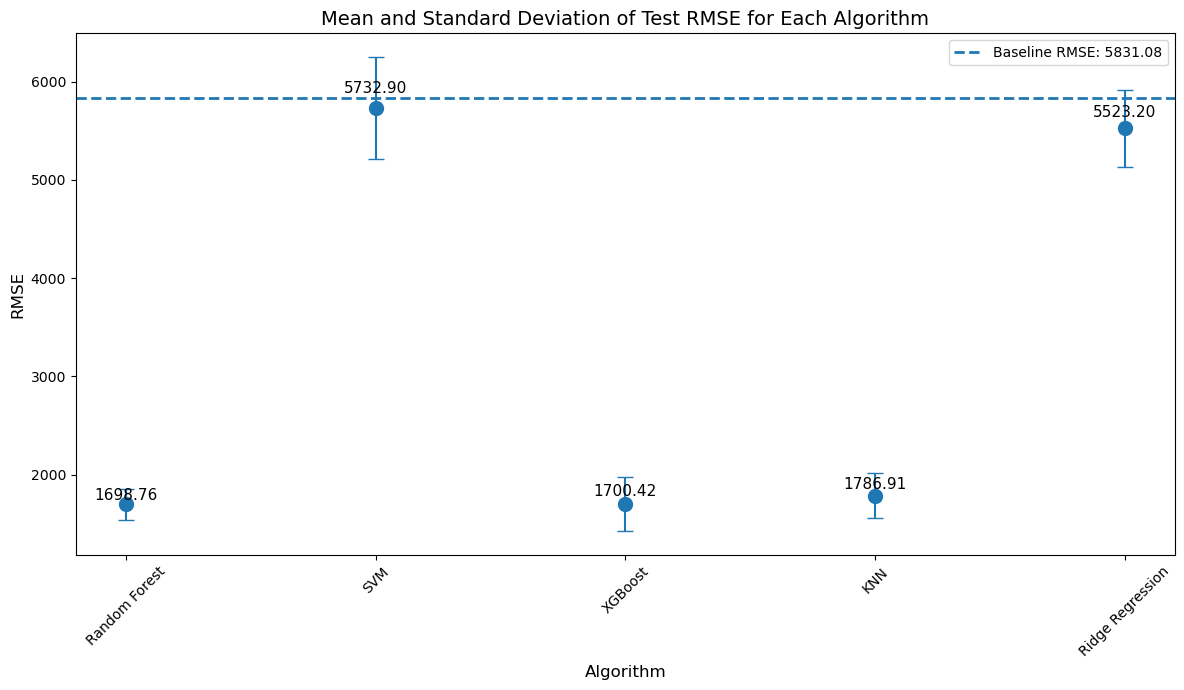

In [25]:
import numpy as np
import matplotlib.pyplot as plt


scores_dict = {
    'Random Forest': RF_Score,          
    'SVM': SVM_Score,                   
    'XGBoost': xgb_test_scores,         
    'KNN': KNN_Score,                  
    'Ridge Regression': Ridge_Score   
}


model_names = []
means = []
std_devs = []

print("Average scores and standard deviations:")
for model, scores in scores_dict.items():
    model_names.append(model)

    scores = np.array(scores) 
    mean_score = np.mean(scores)
    std_dev = np.std(scores)

    means.append(mean_score)
    std_devs.append(std_dev)

    print(f"{model}: Mean = {mean_score:.4f}, Std Dev = {std_dev:.4f}")

#CREATE FINAL PRESENTATION PLOT
plt.figure(figsize=(12, 7))

plt.errorbar(
    model_names,
    means,
    yerr=std_devs,
    fmt='o',
    capsize=6,
    markersize=10
)

#LABEL EACH MEAN VALUE
for i, value in enumerate(means):
    plt.text(i, value + std_devs[i]*0.3, f"{value:.2f}", ha='center', fontsize=11)

#BASELINE LINE (RMSE BASELINE)

plt.axhline(
    y=baseline_rmse,
    linestyle='--',
    linewidth=2,
    label=f"Baseline RMSE: {baseline_rmse:.2f}"
)

#FORMATTING (PRESENTATION READY)
plt.ylabel("RMSE", fontsize=12)
plt.xlabel("Algorithm", fontsize=12)
plt.title(
    "Mean and Standard Deviation of Test RMSE for Each Algorithm",
    fontsize=14
)

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()


plt.savefig("Final_Model_Comparison.png", dpi=300, bbox_inches="tight")
plt.show()


## 6. Model Insepection Random Forest

In [26]:
def get_best_model(models, scores):
    """
    Selects the best model based on the HIGHEST score.
    """
    best_index = np.argmax(scores)
    return models[best_index]


In [27]:
RF_Best_Model = get_best_model(RF_Models,RF_Score)

In [28]:
from sklearn.model_selection import train_test_split

X_other, X_test, y_other, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=123
)


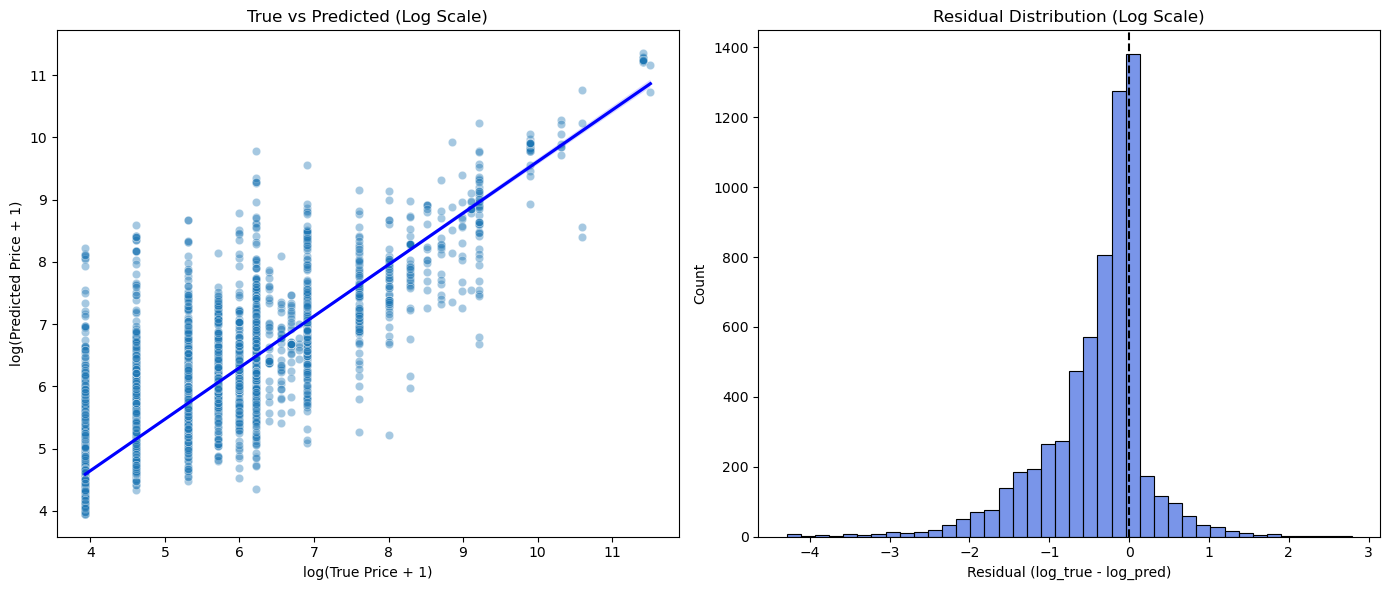

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to arrays
true_vals = np.array(y_test)
pred_vals = np.array(y_pred)

# Log transform (log1p handles zeros safely)
log_true = np.log1p(true_vals)
log_pred = np.log1p(pred_vals)

# Residuals in log space
log_residuals = log_true - log_pred

# Plot: True vs Predicted (log)
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(x=log_true, y=log_pred, alpha=0.4)
sns.regplot(x=log_true, y=log_pred, scatter=False, color="blue")
plt.xlabel("log(True Price + 1)")
plt.ylabel("log(Predicted Price + 1)")
plt.title("True vs Predicted (Log Scale)")

# Plot: Residual Distribution (log)
plt.subplot(1,2,2)
sns.histplot(log_residuals, bins=40, color="royalblue", alpha=0.7)
plt.axvline(0, color="black", linestyle="--")
plt.xlabel("Residual (log_true - log_pred)")
plt.ylabel("Count")
plt.title("Residual Distribution (Log Scale)")

plt.tight_layout()
plt.show()


Shuffling: product_rating
   Shuffled RMSE: 1922.264 +/- 75.522
Shuffling: total_reviews
   Shuffled RMSE: 5799.762 +/- 101.762
Shuffling: original_price
   Shuffled RMSE: 2077.835 +/- 26.499
Shuffling: is_best_seller
   Shuffled RMSE: 1546.282 +/- 55.57
Shuffling: is_sponsored
   Shuffled RMSE: 3057.477 +/- 26.785
Shuffling: has_coupon
   Shuffled RMSE: 911.29 +/- 0.702
Shuffling: buy_box_availability
   Shuffled RMSE: 903.855 +/- 0.0
Shuffling: sustainability_tags
   Shuffled RMSE: 967.795 +/- 4.353
Shuffling: product_category
   Shuffled RMSE: 3619.71 +/- 90.163
Shuffling: discount_percentage
   Shuffled RMSE: 1616.63 +/- 21.959


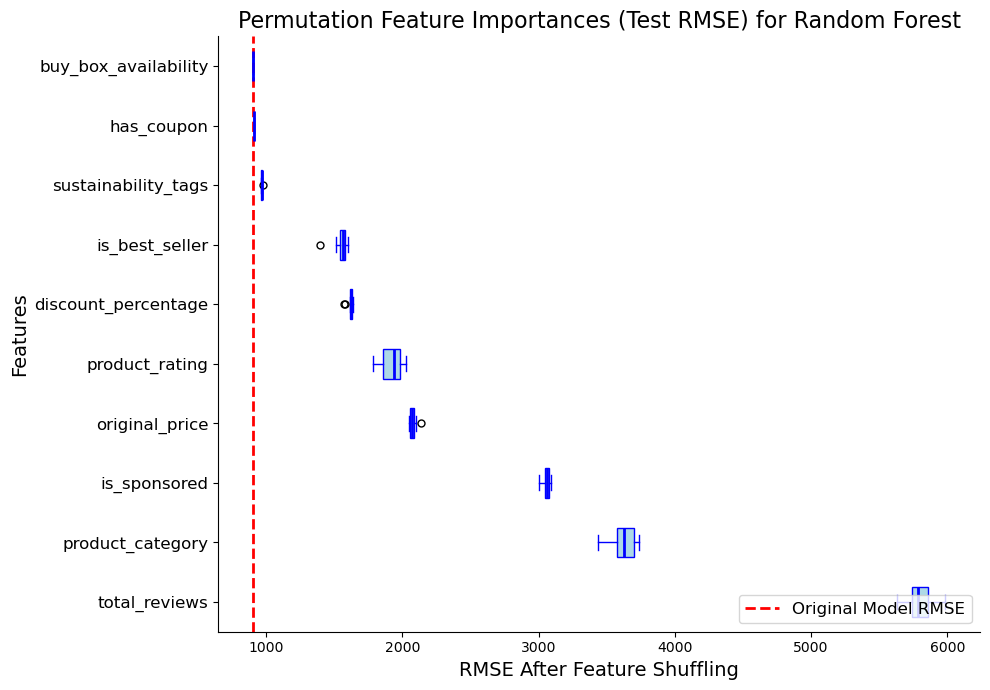

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

#Feature Names
Feature_Name = X_test.columns

# Store 10 RMSE values per feature
scores = np.zeros([len(Feature_Name), 10])

#Permutation Importance Loop (RMSE)
for i in range(len(Feature_Name)):
    print("Shuffling:", Feature_Name[i])
    rmse_scores = []

    for j in range(10):
        X_test_shuffled = X_test.copy()

        # Shuffle ONE column at a time
        X_test_shuffled[Feature_Name[i]] = np.random.permutation(
            X_test[Feature_Name[i]].values
        )

        # Predict with shuffled feature
        y_pred = RF_Best_Model.predict(X_test_shuffled)

        # Compute RMSE (REGRESSION METRIC ✅)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    print(
        "   Shuffled RMSE:",
        np.around(np.mean(rmse_scores), 3),
        "+/-",
        np.around(np.std(rmse_scores), 3),
    )

    scores[i] = rmse_scores

#Sort Features by Importance(Higher RMSE = MORE important)
sorted_inds = np.argsort(np.mean(scores, axis=1))[::-1]

#Create Boxplot
fig, ax = plt.subplots(figsize=(10, 7))

box = ax.boxplot(
    scores[sorted_inds].T,
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor="lightblue", color="blue"),
    medianprops=dict(color="blue", linewidth=2),
    whiskerprops=dict(color="blue"),
    capprops=dict(color="blue"),
    flierprops=dict(marker="o", color="blue", markersize=5),
)

# Feature labels
ax.set_yticks(np.arange(1, len(sorted_inds) + 1))
ax.set_yticklabels(np.array(Feature_Name)[sorted_inds], fontsize=12)

#Baseline Vertical Line
baseline_rmse = np.sqrt(mean_squared_error(y_test, RF_Best_Model.predict(X_test)))

ax.axvline(
    baseline_rmse,
    label="Original Model RMSE",
    color="red",
    linestyle="--",
    linewidth=2,
)

#Titles & Labels

ax.set_title(
    "Permutation Feature Importances (Test RMSE) for Random Forest",
    fontsize=16,
)
ax.set_xlabel("RMSE After Feature Shuffling", fontsize=14)
ax.set_ylabel("Features", fontsize=14)

# Formatting
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.legend(fontsize=12, loc="lower right")

plt.tight_layout()
plt.savefig("RF_Permutation_Importance.png", dpi=300, bbox_inches="tight")
plt.show()


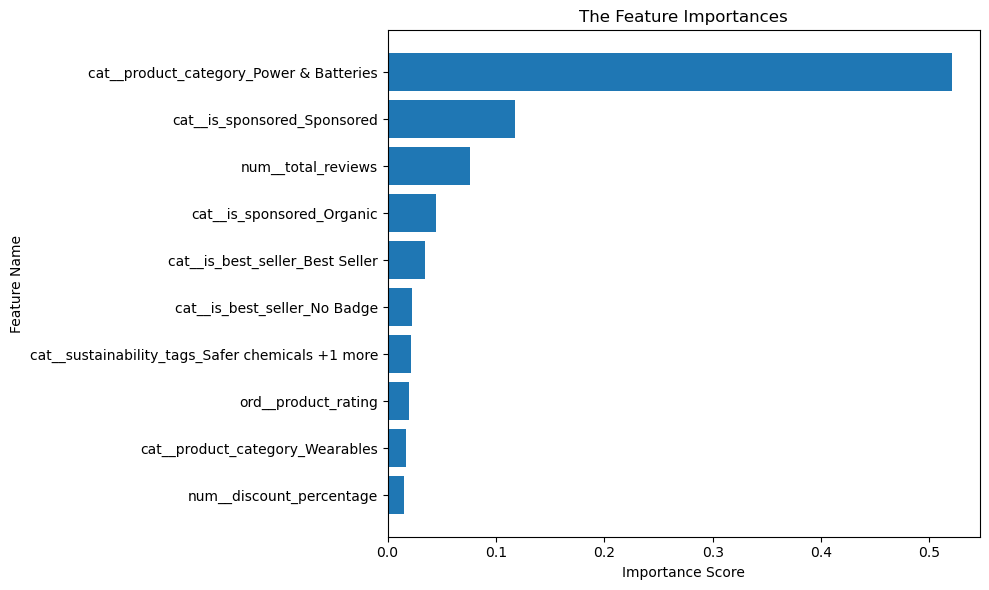

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#XGBOOST FEATURE IMPORTANCE

# 1. Get feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# 2. Extract trained XGBoost feature importances
xgb_importances = best_xgb_model.named_steps["model"].feature_importances_

# 3. Build DataFrame
xgb_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": xgb_importances
})

# 4. Sort and take the most important
xgb_importance_df = xgb_importance_df.sort_values(
    by="Importance", ascending=False
).head(10)

# 5. Plot
plt.figure(figsize=(10, 6))
plt.barh(xgb_importance_df["Feature"], xgb_importance_df["Importance"])
plt.gca().invert_yaxis()

plt.title("The Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")

plt.tight_layout()
plt.savefig("The top10 feature_importance.png", dpi=300, bbox_inches="tight")
plt.show()


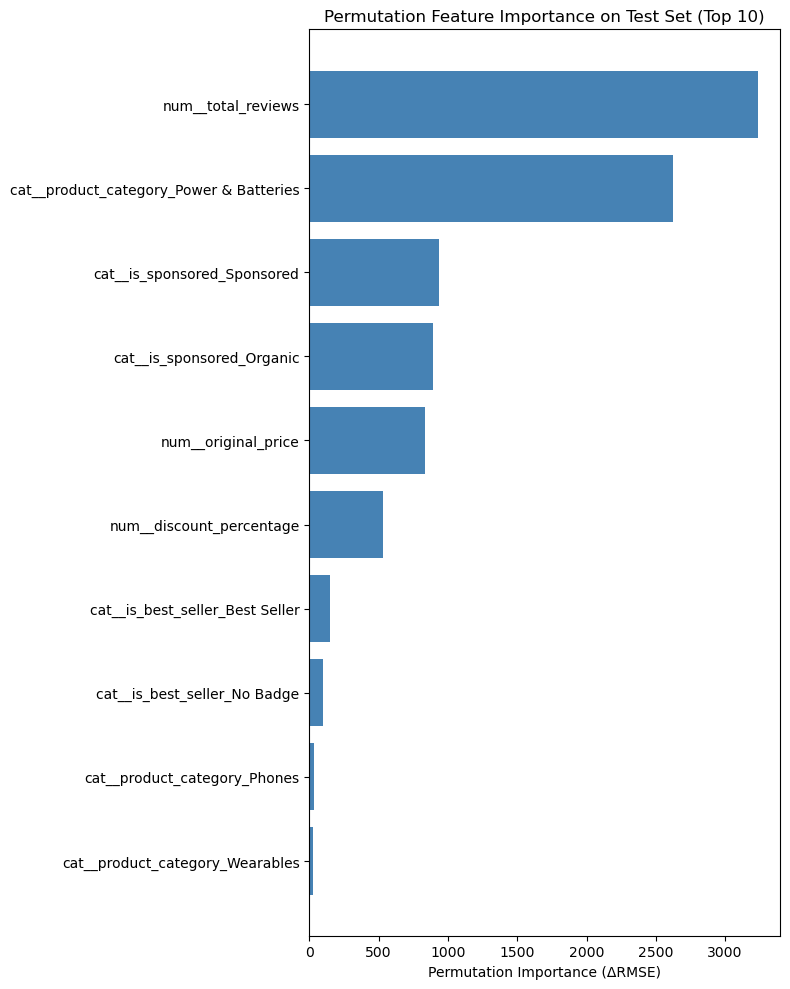

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# 1. Get model inside your pipeline
rf_model = best_rf_model.named_steps["model"]

# 2. Transform X_test (sparse) → convert to dense
X_test_processed = preprocessor.transform(X_test).toarray()

# 3. Get feature names
feature_names = preprocessor.get_feature_names_out()

# 4. Compute permutation importance
result = permutation_importance(
    rf_model,
    X_test_processed,   # must be dense
    y_test,
    n_repeats=10,
    scoring="neg_root_mean_squared_error",
    random_state=42
)

# 5. Extract importances
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

# 6. Plot Top 10
plt.figure(figsize=(8, 10))
plt.barh(
    np.array(feature_names)[indices][:10],
    importances[indices][:10],
    color="steelblue"
)
plt.gca().invert_yaxis()
plt.xlabel("Permutation Importance (ΔRMSE)")
plt.title("Permutation Feature Importance on Test Set (Top 10)")
plt.tight_layout()
plt.show()


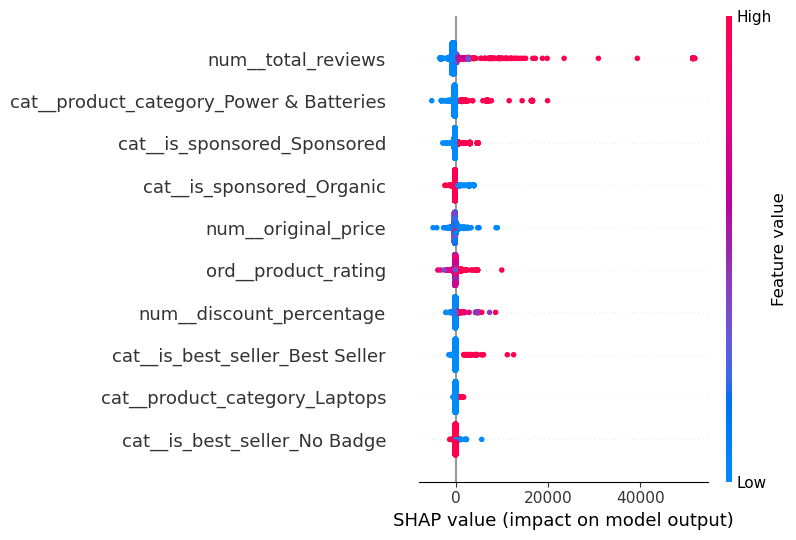

In [32]:
import shap
import numpy as np
import matplotlib.pyplot as plt

#Extract trained Random Forest model
rf_model = RF_Best_Model.named_steps["model"]

#Transform X_test using preprocessor
X_test_prep = RF_Best_Model.named_steps["preprocessor"].transform(X_test)

if hasattr(X_test_prep, "toarray"):
    X_test_prep = X_test_prep.toarray()

X_test_prep = X_test_prep.astype(np.float64)

#Get feature names AFTER preprocessing
feature_names = RF_Best_Model.named_steps[
    "preprocessor"
].get_feature_names_out()

#Create SHAP Explainer
explainer = shap.TreeExplainer(rf_model)

#Compute SHAP values
shap_values = explainer.shap_values(X_test_prep)

#SHAP Summary Plot (Top 10)
shap.summary_plot(
    shap_values,
    X_test_prep,
    feature_names=feature_names,
    max_display=10,
    show=False
)

#Save figure

plt.savefig("RF_SHAP_Summary.png", dpi=300, bbox_inches="tight")
plt.show()
